# Исследование закономерностей, определяющих успешность игры
 Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 
 План работы:

- Изучение общей информации о данных
- Предобработка данных
 - изменение названий столбцов
 - преобразование типов данных
 - поиск неявных дубликатов и замена
 - поиск пропусков и замена
 - введение дополнительных столбцов
- Исследовательский анализ данных
- Определение и проверка гипотез
- Общий вывод

Описание данных:

- `Name` —  название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10) 
- `Rating` — Рейтинг от организации ESRB

In [125]:
# Ячейка с импортом библиотек, 
# в других ячейках не задавать!
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st


In [126]:
# Ячейка с c начальными настройками Pandas
pd.set_option('display.max_columns', 50) 
pd.options.mode.chained_assignment = None

## Изучение общей информации о данных

In [127]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')


data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Выведем сводный набор гистограмм для каждого из столбцов для оценки распределения значений:

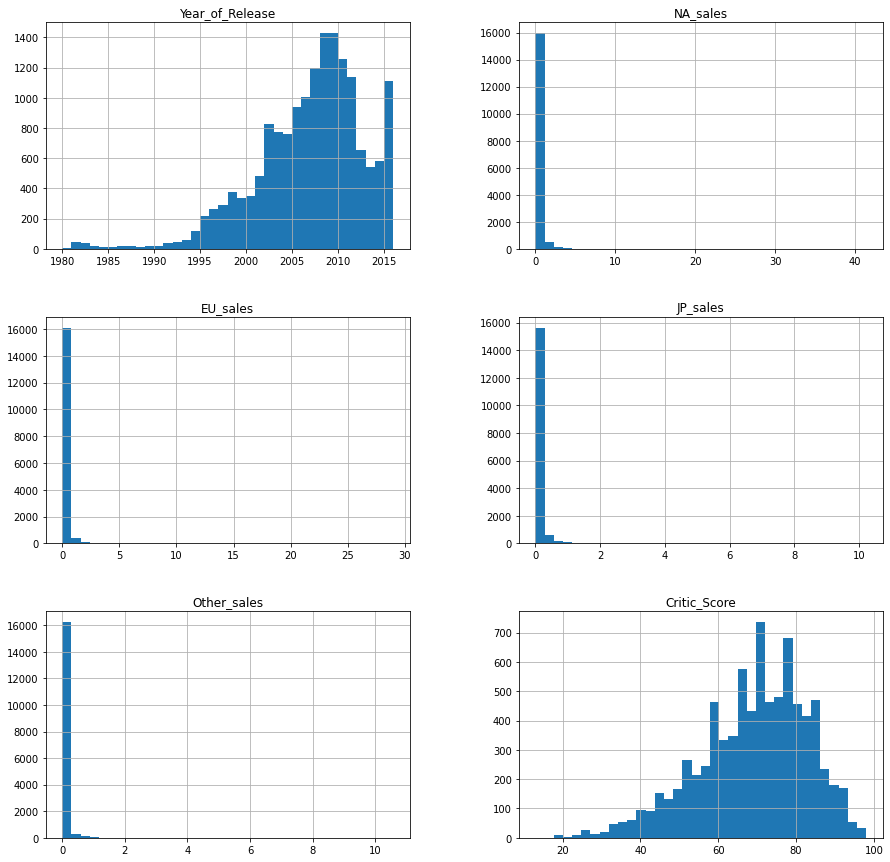

In [128]:
data.hist(figsize=(15, 15), bins = 36);

**Вывод по разделу 1**

- В данных 11 колонок и 16715 строк
- В 6 из 11 колонок есть пропуски
- Распределение данных для продаж, судя по гистограммам, в целом соответствует распределению Пуасонна, однако некоторые значения имеют очень широкий диапазон, так что в данных вероятны всплески в крайних значениях, влияющие на общую картину.
- Распределение оценок критиков и годов выпуска близко к нормальному распределению.
- Гистограмма для данных в колонках User_Score не построилась - с этими данными что-то не так (это не числа)

## Предобработка данных

### Изменение названий столбцов

Приведем названия столбцов к единому виду. Названия столбцов стандартизированы с учетом змеиного регистра, поэтому просто приведем все к нижнему регистру и выведем новую информацию о наборе данных:

In [129]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразование типов данных

В 6 из 11 столбцах набора данных есть пропуски. Тип данных в 2 столбцах не соответствует ожидаемому.

Рассмотрим столбцы подробнее, и определим, какие причины пропусков могли быть, и возможно ли заменить их на конкретные значения.

В таблице также учтем тип данных в каждом столбце и требуемый новый тип данных.

Результаты сведем в таблицу:

|Имя столбца|Тип данных|Новый тип данных|Описание данных|Пропуски|Причина|Замена
|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------
|name|object|-|название игры|2|Полностью случайный|Удаление
|platform|object|-|платформа|0|-|-
|year_of_release|float64|Int64|год выпуска|269|Полностью случайный|Удаление
|genre|object|-|жанр игры|2|Полностью случайный|Удаление
|na_sales|float64|-|продажи в Северной Америке (миллионы проданных копий)|0|-|-
|eu_sales|float64|-|продажи в Европе (миллионы проданных копий)|0|-|-
|jp_sales|float64|-|продажи в Японии (миллионы проданных копий)|0|-|-
|other_sales|float64|-|продажи в других странах (миллионы проданных копий)|0|-|-
|critic_score|float64|-|оценка критиков (максимум 100)|8578|Неслучайный|NaN
|user_score|object|float64|оценка пользователей (максимум 10)|6701|Неслучайный|NaN
|rating|object|-|Рейтинг от организации ESRB|6766|Неслучайный|Замена на "n/a" (Без рейтинга)


Для начала оценим количество данных с пропусками в сторбцах `name`, `genre` и `year_of_release`
Если эта выборка составляет менее 10% от всего набора то удалим их.

In [130]:
# задаем временную переменную, хранящую долю выброса в выборке
anomaly_part = len(
    data.loc[(data['name'].isna()) | 
             (data['genre'].isna()) |
             (data['year_of_release'].isna())]) / len(data)

print(f'Рассматриваемая выборка (Игры с пропусками в name, genre и year_of_release) составляет {anomaly_part:.3%} от общего размера данных.')
print()
if anomaly_part >= 10:
    print('Рассматриваемая выборка составляет более 10% от общего размера данных.\nЗначения этих данных важны для анализа своим количеством, поэтому: \nОСТАВИМ их в наборе данных')
else:
        print('Рассматриваемая выборка составляет менее 10% от общего размера данных.\nЗначения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:\nУДАЛИМ их из набора данных')

Рассматриваемая выборка (Игры с пропусками в name, genre и year_of_release) составляет 1.621% от общего размера данных.

Рассматриваемая выборка составляет менее 10% от общего размера данных.
Значения этих данных искажают результаты исследования их значимость не подтверждена количеством, поэтому:
УДАЛИМ их из набора данных


In [131]:
data = data.dropna(subset=['year_of_release','genre','name']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Предварительно в сводной таблице были обозначены типы данных столбцов и предложена замена типа данных.

Объясним необходимость замены для каждых отмеченных столбцов:

столбец `year_of_release` предполагает числовое значение и хранятся в виде десятичных дробей **float64**, хотя по смыслу это целые числа **Int64**
столбец `user_score` предполагает числовое значение и хранятся в виде строк **object**, хотя по смыслу это десятичные дроби **float64**

Оценим уникальные значения в отмеченных столбцах:

In [132]:
display(data['year_of_release'].unique())
display(data['user_score'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец `year_of_release` просто приведем  к целочисленному виду согласно принятым правилам

In [133]:
data['year_of_release'] = data['year_of_release'].astype('int64')

In [134]:
tbd_count = len(data.loc[(data['user_score'] == 'tbd')])
zero_count = len(data.loc[(data['user_score'] == '0')])
nan_count = len(data.loc[(data['user_score'].isna())])
print(f'Столбец `user_score` содержит нехарактерные значения:\n \
      - "tbd" - то есть "Подлежат уточнению (англ.)" - таких значений {tbd_count} \n \
      - "0" - таких значений {zero_count} \n \
      - "nan" - таких значений {nan_count}')

Столбец `user_score` содержит нехарактерные значения:
       - "tbd" - то есть "Подлежат уточнению (англ.)" - таких значений 2376 
       - "0" - таких значений 1 
       - "nan" - таких значений 6605


По смыслу все три варианта нехарактерных значений столбца `user_score` означают одно: игра не оценивалась пользователями должным образом, поэтому переведем все значения в числовые, а нехарактерные оставим как NaN. Единственное значение '0' удалим.

In [135]:
data = data.loc[~(data.user_score == 0)]
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Столбцы `user_score` и `critic_score` содержат количественные переменные. 

На них приходится существенная доля пропусков. Количество пропусков для user_score = 6605, critic_score = 8461 и rating = 6676

Рассомтрим срез данных, с условием: каждый из элементов набора содержит пропуски в столбцах `user_score`, `critic_score` и `rating`

In [136]:
display(data.loc[(data['user_score'].isna()) & (data['critic_score'].isna()) & (data['rating'].isna())])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Размер выборки 6580 строк, то есть большинство пропусков встречаются вместе, нет данных по одним и тем же играм. Скорее всего для этих игр такие данные не существуют или не были загружены в таблицу.

Замена числовых данных в таких пропусках на медианы может существенно исказить структуру данных и выводы исследования, поэтому
- пропуски в столбцах `user_score`, `critic_score` не изменяем, оставляем NaN

Столбец `rating` содержит категориальные значения. Пропуски в нем вероятно означают, что организация не оценивала конкретную игру, поэтому оставим незаполненные значения как NaN.

### Поиск дубликатов / неявных дубликатов и замена

По смыслу из описания данных в некоторых столбцах могут быть явные и неявные дубликаты:

`name` - явные и неявные дубликаты

`platform` - неявные дубликаты

`genre` - неявные дубликаты

`rating` - неявные дубликаты

Оценим количество явных дубликатов в столбце `name`:

In [137]:
print('Количество дубликатов в столбце "name":',data['name'].duplicated().sum())

Количество дубликатов в столбце "name": 5018


Это достаточно большое количество, чтобы их просто удалить. Посмотрим на дубликаты отдельно, выведем строки, содержащие только дубликаты в столбце `name` и отсортируем их по имени

In [138]:
display(data[data['name'].isin(data['name'][data['name'].duplicated()])].sort_values('name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
1285,007: Quantum of Solace,X360,2008,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
4475,007: Quantum of Solace,PS2,2008,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
1785,007: Quantum of Solace,PS3,2008,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
...,...,...,...,...,...,...,...,...,...,...,...
649,pro evolution soccer 2011,PS3,2010,Sports,0.29,1.17,0.54,0.41,77.0,6.8,E
2583,pro evolution soccer 2011,PSP,2010,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
12648,pro evolution soccer 2011,PC,2010,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN
15612,uDraw Studio: Instant Artist,X360,2011,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E


Как видно, явные дубликаты в названии связаны с разными платформами. Игра может быть выпущена с одинаковым названием для разных платформ.

Однако, возможно, что некоторые дубликаты в связке `name` + `platform` все-таки остались. Для проверки этого создадим временный столбец `name_with_platform` и удалим дубликаты в нем.


In [139]:
# Создадим новый временный столбцец name_with_platform со "склееным" именем игры и названием платформы
data['name_with_platform'] = data['name'] + data['platform']
print('Количество дубликатов в столбце "name_with_platform":',data['name_with_platform'].duplicated().sum())
# Удалим явные дубликаты в столбце name_with_platform
data = data.drop_duplicates(subset=['name_with_platform']).reset_index(drop=True)
print('Дубликаты в столбце "name_with_platform" удалены')
# Удалим временный столбец name_with_platform
data = data.drop(columns = ['name_with_platform'],axis = 1)

Количество дубликатов в столбце "name_with_platform": 3
Дубликаты в столбце "name_with_platform" удалены


Оценим неявные дубликаты в столбцах `platform`, `genre`, `rating`

In [140]:
print('Столбец "platform" -  ',data['platform'].unique())
print()
print('Столбец "genre" -  ',data['genre'].unique())
print()
print('Столбец "rating" -  ',data['rating'].unique())


Столбец "platform" -   ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Столбец "genre" -   ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

Столбец "rating" -   ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Неявные дубликаты в столбцах `platform` и `genre` отсутствуют.
В столбце `rating` присутствует неявный дубликат: `K-A` и `E`. По описанию из открытых источников это одно и то же. Заменим все `K-A` на `E` 

In [141]:
data.loc[(data.rating == 'K-A'), 'rating'] = 'E'

Пропуски типа nan в категориальной переменной Rating не могут быть учтены в последующих исследованиях, в силу логики языка программирования.

Заменим эти пропуски на значение "n/a" типа строка, чтобы корректно обрабатывать их в дальнейшем.

In [142]:
data['rating'] = data['rating'].fillna(value='n/a')
print('Столбец "rating" -  ',data['rating'].unique())

Столбец "rating" -   ['E' 'n/a' 'M' 'T' 'E10+' 'AO' 'EC' 'RP']


### Поиск пропусков и замена

In [143]:
data.info()

#print('Столбец "critic_score" -  ',data['critic_score'].unique())
#print()
#print('Столбец "user_score" -  ',data['user_score'].unique())
#print()
#print('Столбец "rating" -  ',data['rating'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           16441 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Введение дополнительных столбцов

Для целей категоризации данных введем дополнительный столбец `total_sales` со суммарными продажами для каждой игры во всех регионах

In [144]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Вывод по разделу 2**

- Изначально в данных 11 колонок и 16715 строк
- После предобработки в данных 12 колонок и 16441 строк
- Потери в данных в результате предобработки составляют 1,64%  и принимаются как не критические потери для набора данных
- в результате предобработки было выполнено:
  - изменение названий столбцов
  - преобразование типов данных в столбцах `year_of_release` и `user_score`
  - поиск и удаление явных / неявных дубликатов в столбцах  `name`, `platform`, `genre` и `rating`
  - обработка пропусков в столбцах `name`, `genre` и `year_of_release`
  - замена пропусков в столбцах `user_score` и `critic_score` на медианные значения
  - введение дополнительного столбца `total_sales`

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           16441 non-null  object 
 11  total_sales      16441 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

### Оценка выпущенных игр по годам

Построим гистограмму с количеством выпущенных игр по годам. 

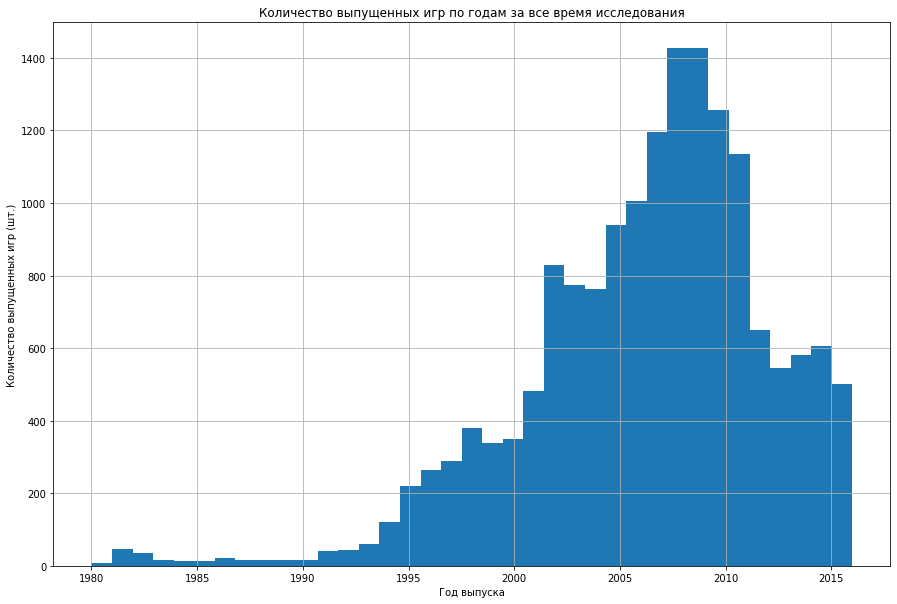

In [146]:
data['year_of_release'].hist(bins = 37, figsize=(15,10));
plt.ylabel('Количество выпущенных игр (шт.)')
plt.xlabel('Год выпуска')
plt.title('Количество выпущенных игр по годам за все время исследования')
plt.show()


Судя по гистограмме, существенное количество игр было выпущено в период с 1995 по н.в. Именно в 1995 количество выпущенных игр впервые превысило 200 в год.

### Оценка распределение продаж по платформам по годам

Оценим распределение продаж по годам для каждой из платформ.
Покажем сводную таблицу с данными о продажах по платформам за все время:

In [147]:
data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(  
    'total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,959.99
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Для облегчения графика будем рассматривать только платформы с числом суммарных продаж более 100 млн копий за все время.
Построим распределение продаж по годам для каждой из выбранных платформ.

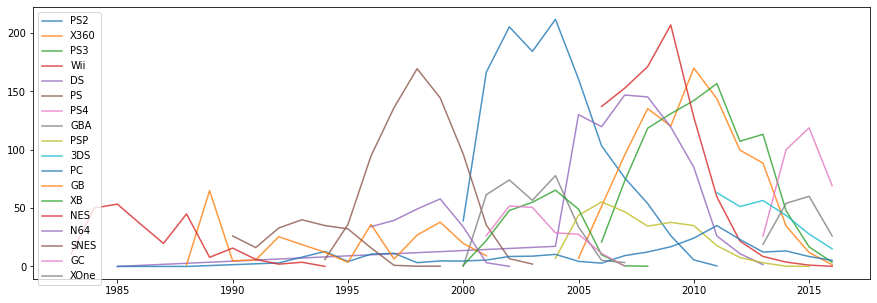

In [148]:
# Cоставим сводную таблицу по платформам, с количеством продаж за каждый год и по регионам
platform_pivot = data.pivot_table(index=['platform','year_of_release'], values=['total_sales','na_sales','eu_sales','jp_sales', 'other_sales'], aggfunc='sum').reset_index()

plt.figure(figsize=(15,5))

for platform_name, total_sales in data.pivot_table(                      # Перебор пар платформа - общие продажи
    index='platform', values='total_sales', aggfunc='sum').sort_values(  # во временной сводной таблице
    'total_sales', ascending=False)['total_sales'].items():              # без детализации по годам
    
    if total_sales > 100:                                                # Условие - общие продажи более 100 млн копий
        plt.plot(platform_pivot[platform_pivot['platform'] == platform_name]['year_of_release'],
                 platform_pivot[platform_pivot['platform'] == platform_name]['total_sales'], 
                 label=platform_name, alpha=0.8)
# выводим легенду
plt.legend()    
plt.show()


Для оценки цикличности времени жизни платформы применим диаграммы размаха для нескольких , чтобы определить значения:


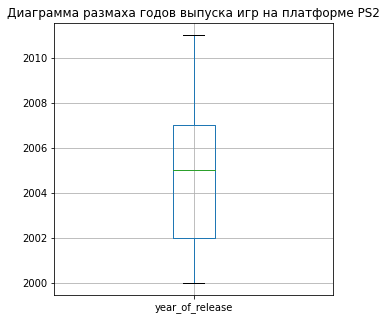

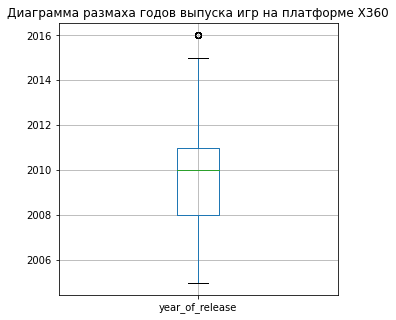

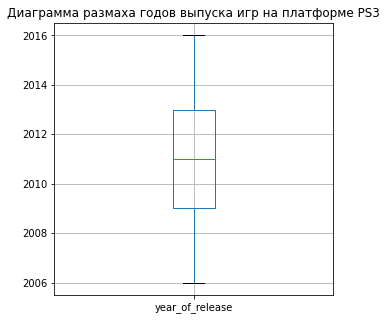

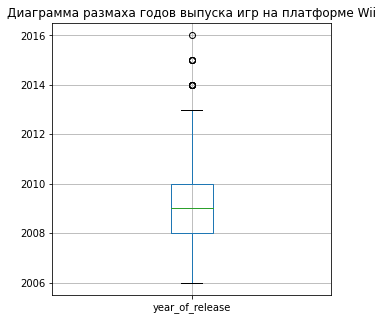

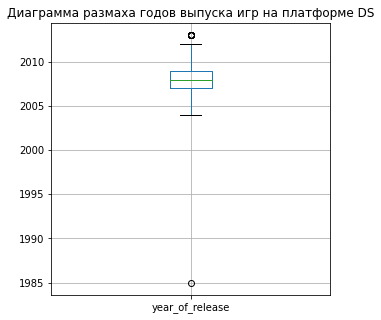

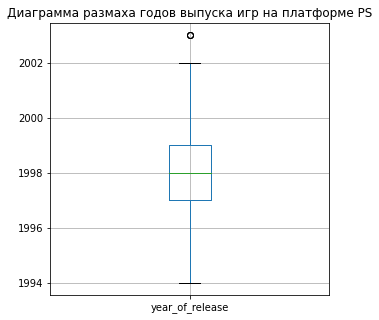

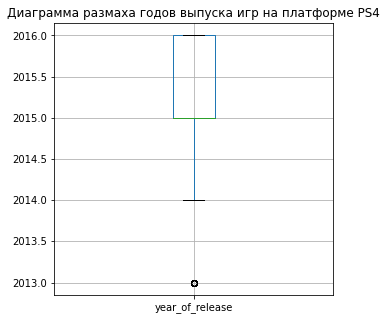

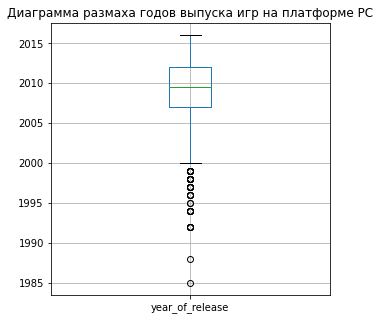

In [149]:
def boxplot_show2(platform_name):
    data[data['platform'] == platform_name].boxplot('year_of_release', figsize=(5, 5))
    plt.title('Диаграмма размаха годов выпуска игр на платформе ' + platform_name)
    plt.show()
    #print(data[data['platform'] == platform_name]['year_of_release'].describe())

boxplot_show2('PS2')
boxplot_show2('X360')
boxplot_show2('PS3')
boxplot_show2('Wii')
boxplot_show2('DS')
boxplot_show2('PS')
boxplot_show2('PS4')
boxplot_show2('PC')

Исходя из распределения можно отметить:
- Продажи по платформам показывают цикличность во времени
- Средний цикл "жизни" платформы 5-10 лет
- Новые платформы появляются в среднем раз в 5 лет
- Большинство игр появляются в течение 3-5 лет жизни платформы - эту метрику примем основной для анализа данных

In [168]:
def platform_lifetime_mean(row):
    platform_name = row['platform']
    mustache_length = ( data[data['platform'] == platform_name]['year_of_release'].describe()['75%'] -
                       data[data['platform'] == platform_name]['year_of_release'].describe()['25%']) * 1.5

    return (data[data['platform'] == platform_name]['year_of_release'].describe()['75%'] + mustache_length) - (
        data[data['platform'] == platform_name]['year_of_release'].describe()['25%'] - mustache_length)

platform_pivot = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
platform_pivot['lifetime'] = platform_pivot.apply(platform_lifetime_mean, axis=1)

display (platform_pivot)

print ('Средняя длина жизни платформы', platform_pivot['lifetime'].mean() )
print ('Медиана длины жизни платформы', platform_pivot['lifetime'].median() )

,platform,total_sales,lifetime
0,2600,86.48,4.0
1,3DO,0.10,2.0
2,3DS,257.81,12.0
3,DC,15.95,4.0
4,DS,802.78,8.0
5,GB,254.43,32.0
6,GBA,312.88,8.0
7,GC,196.73,12.0
8,GEN,28.35,8.0
9,GG,0.04,0.0


Средняя длина жизни платформы 8.903225806451612
Медиана длины жизни платформы 8.0


In [186]:
def platform_year_of_birth(row):
    platform_name = row['platform']
    return data[data['platform'] == platform_name]['year_of_release'].min()

platform_pivot = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
platform_pivot['year_of_birth'] = platform_pivot.apply(platform_year_of_birth, axis=1)
platform_pivot = platform_pivot.sort_values(by='year_of_birth').reset_index(drop=True)
display (platform_pivot)

difference_between_years = []
difference = 0
for i in range(len(platform_pivot)):
    if i != 0:
        difference = platform_pivot.loc[i,'year_of_birth'] - platform_pivot.loc[i - 1,'year_of_birth']
    if difference !=0 and platform_pivot.loc[i,'year_of_birth'] > 2004:
        difference_between_years.append(difference)
        
display(difference_between_years)    

difference_between_years_series = pd.Series(difference_between_years) 

print ('Среднее расстояние между годом рождения жизни платформ', difference_between_years_series.mean() )
print ('Медиана расстояние между годом рождения жизни платформ', difference_between_years_series.median() )

,platform,total_sales,year_of_birth
0,2600,86.48,1980
1,NES,251.05,1983
2,DS,802.78,1985
3,PC,255.68,1985
4,GB,254.43,1988
5,SNES,200.04,1990
6,GEN,28.35,1990
7,GG,0.04,1992
8,SCD,1.86,1993
9,NG,1.44,1993


[1, 1, 5, 1, 1]

Среднее расстояние между годом рождения жизни платформ 1.8
Медиана расстояние между годом рождения жизни платформ 1.0


### Определение актуального перида для дальнейшей оценки

Для оценки данных будем учитывать данные за последние 5 лет. Это диапазон появления большинства игр платформы, то есть с 2010 по 2015 год. 

Это актуальный период для 2017 года, ведь за прошедшее время произошло полное обновление цикла "жизни" платформ.

2016 год не включаем, так как данные за этот год не полные.

Построим то же распределение но за выбранный актуальный период.

(2010.0, 2015.0)

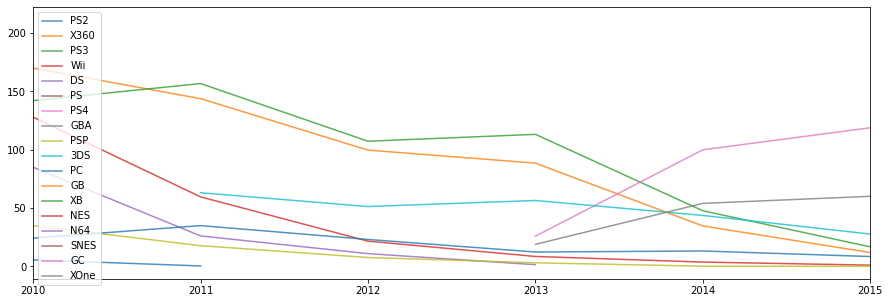

In [26]:
plt.figure(figsize=(15,5))

for platform_name, total_sales in data.pivot_table(                      # Перебор пар платформа - общие продажи
    index='platform', values='total_sales', aggfunc='sum').sort_values(  # во временной сводной таблице
    'total_sales', ascending=False)['total_sales'].items():              # без детализации по годам
    
    if total_sales > 100:                                                # Условие - общие продажи более 100 млн копий
        plt.plot(platform_pivot[platform_pivot['platform'] == platform_name]['year_of_release'],
                 platform_pivot[platform_pivot['platform'] == platform_name]['total_sales'], 
                 label=platform_name, alpha=0.8);
        
# выводим легенду
plt.legend()
# Задаем границы диапазона
plt.xlim([2010, 2015])
#plt.show()


На графике видно:
- платформы `PS4`, `XOne` стабильно растут с 2013 года. Выберим их как поценциально прибыльные платформы.
- платформы `PS3`, `X360` и `Wii` прошли свой пик в 2009-2011 годах и стабильно падают к настоящему времени
- прочие платформы имеют несущественные продажи

In [27]:
data = data.query('year_of_release > 2010 and year_of_release < 2016')

### Оценка глобальных продаж игр в пределах популярных платформ

Для оценки значений продаж игр в потенциально прибыльных платформах построим диаграмму размаха по глобальным продажам игр для этих платформ.

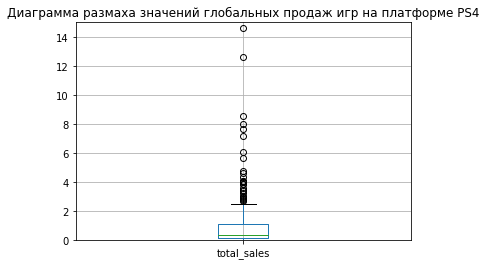

count    228.000000
mean       1.074079
std        1.899788
min        0.010000
25%        0.097500
50%        0.310000
75%        1.105000
max       14.630000
Name: total_sales, dtype: float64


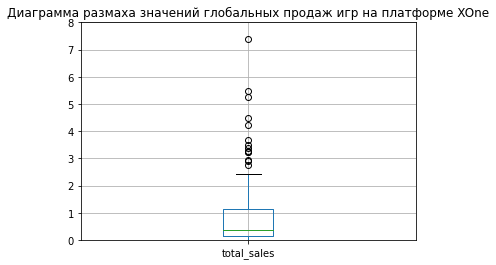

count    160.000000
mean       0.832313
std        1.182243
min        0.010000
25%        0.130000
50%        0.350000
75%        1.137500
max        7.390000
Name: total_sales, dtype: float64


In [28]:
def boxplot_show(platform_name, ymax):
    plt.ylim(0, ymax)
    data[data['platform'] == platform_name].boxplot('total_sales', figsize=(10, 5))
    plt.title('Диаграмма размаха значений глобальных продаж игр на платформе ' + platform_name)
    plt.show()
    print(data[data['platform'] == platform_name]['total_sales'].describe())

boxplot_show('PS4', 15)
boxplot_show('XOne', 8)

Распределение значений глобальных продаж игр для обеих выбранных платформ смещено вправо, для платформы
- `PS4` нормальный диапазон значений лежит в пределах 0,01 .. 2,6 млн копий, среднее 1,07 млн копий, медиана 0,31 млн копий. До значений в 5 млн копий выбросов достаточно много, более 5 млн копий - около 8 игр
- `XOne` нормальный диапазон значений лежит в пределах 0,01 .. 2,65 млн копий, среднее 0,83 млн копий, медиана 0,35 млн копий. До значений 3.5 млн копий выбросов достаточно, но меньше чем у PS4, более 3.5 млн копий имеют только 8 игр

В целом платформа `PS4` имеет большее количество *бестселлеров* чем `XOne`, однако средний диапазон количества глобальных продаж у них практически совпадает (0,01 .. 2,65 млн копий)


### Зависимость уровня глобальных продаж от оценки пользователей и критиков.

Рассмотрим корреляцию количества глобальных продаж и отзывов критиков и пользователей для платформы PS4

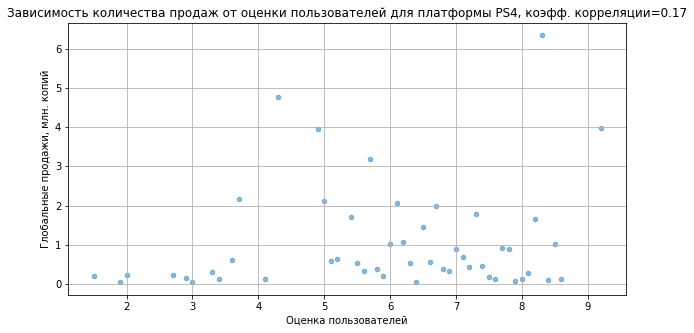

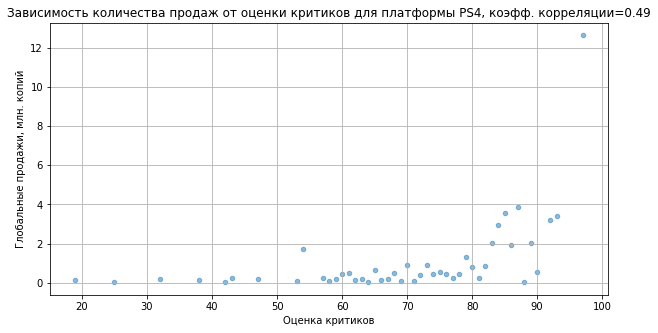

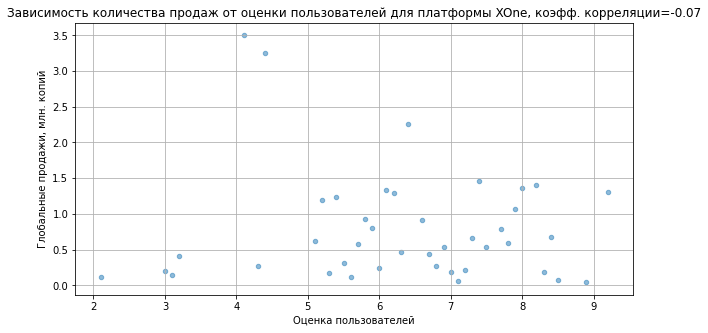

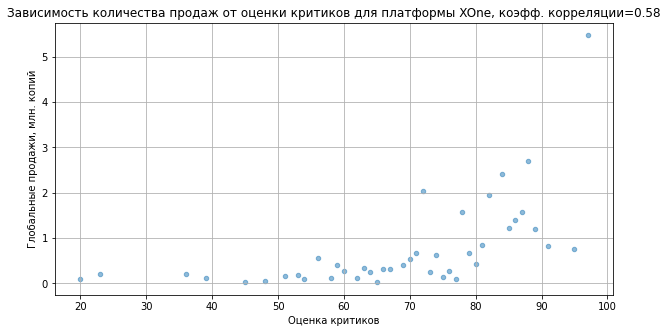

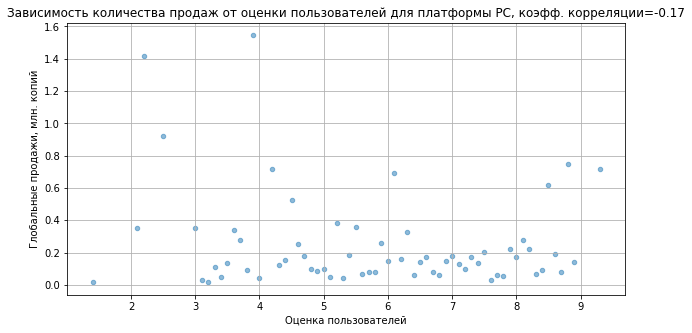

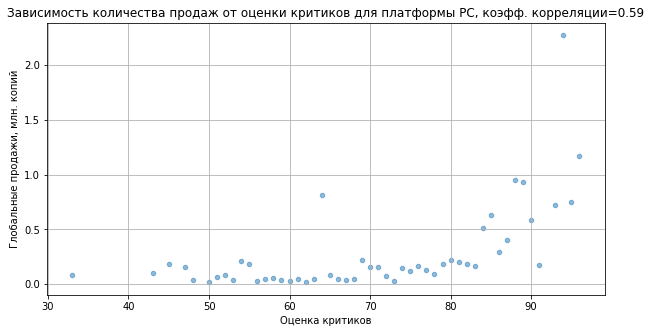

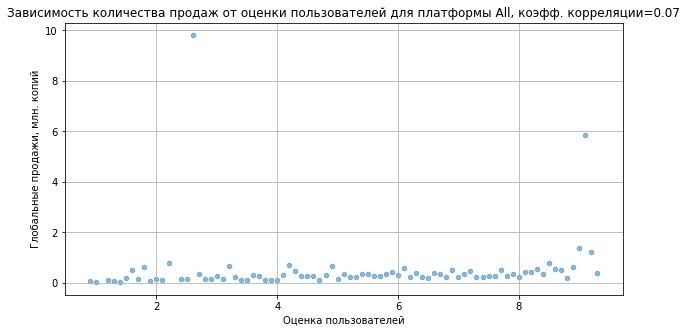

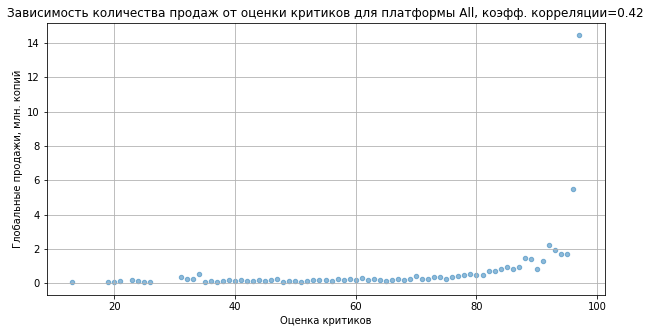

In [29]:
def scatter_show(platform_name, x_values, y_values, x_label, y_label, title, knd='scatter', aggf=['median'], alpha_value=0.5, grid_value=1):
    
    if knd =='scatter': alpha_value = 0.5
    elif knd in ['hist', 'line', 'bar', 'area']: alpha_value = 1
      
    if platform_name == 'All':
        data_pivot_temp = data.pivot_table(index = x_values, values = y_values, aggfunc = aggf).reset_index()
    else:
        data_pivot_temp = data[data['platform'] == platform_name].pivot_table(index = x_values, values = y_values, aggfunc = aggf).reset_index()
    data_pivot_temp.columns = [x_values, y_values]
    correlation = data_pivot_temp.corr().reset_index().loc[0,y_values].round(2).astype(str)
    data_pivot_temp.plot(x=x_values, y=y_values, kind=knd, alpha=alpha_value, grid=grid_value, figsize=(10, 5))
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title + ' для платформы ' + platform_name + ', коэфф. корреляции=' + correlation)
    plt.show;
    
scatter_show('PS4', 'user_score', 'total_sales', 'Оценка пользователей', 'Глобальные продажи, млн. копий', 'Зависимость количества продаж от оценки пользователей')
scatter_show('PS4', 'critic_score', 'total_sales', 'Оценка критиков', 'Глобальные продажи, млн. копий', 'Зависимость количества продаж от оценки критиков')

scatter_show('XOne', 'user_score', 'total_sales', 'Оценка пользователей', 'Глобальные продажи, млн. копий', 'Зависимость количества продаж от оценки пользователей')
scatter_show('XOne', 'critic_score', 'total_sales', 'Оценка критиков', 'Глобальные продажи, млн. копий', 'Зависимость количества продаж от оценки критиков')

scatter_show('PC', 'user_score', 'total_sales', 'Оценка пользователей', 'Глобальные продажи, млн. копий', 'Зависимость количества продаж от оценки пользователей')
scatter_show('PC', 'critic_score', 'total_sales', 'Оценка критиков', 'Глобальные продажи, млн. копий', 'Зависимость количества продаж от оценки критиков')

scatter_show('All', 'user_score', 'total_sales', 'Оценка пользователей', 'Глобальные продажи, млн. копий', 'Зависимость количества продаж от оценки пользователей')
scatter_show('All', 'critic_score', 'total_sales', 'Оценка критиков', 'Глобальные продажи, млн. копий', 'Зависимость количества продаж от оценки критиков')



- Оценки пользователей слабо коррелируют с глобальными продажами, рассчитанный коэффициент корреляции составляет -0.27..+0.17, в зависимости от платформы, можно считать его пренебрежимо малым. 
- Оценки критиков коррелируют с глобальными продажами положительно для исследуемых платформ, но слабовыраженно.  Рассчитанный коэффициент корреляции составляет +0.49.. + 0.58, в зависимости от платформы, он положительный, однако так же не настолько значимый, чтобы говорить о существенной взаимосвязи. 
- Корреляция оценок пользователей с глобальными продажами стабильно меньше чем корреляция оценок критиков с глобальными продажами. Именно оценки критиков можно считать более предпочтительными при оценке потеницально прибыльных игр.

###  Распределение игр по жанрам.

Составим столбчатую диаграмму с количеством выпущенных игр по жанрам, количеством проданных копий по жанрам.

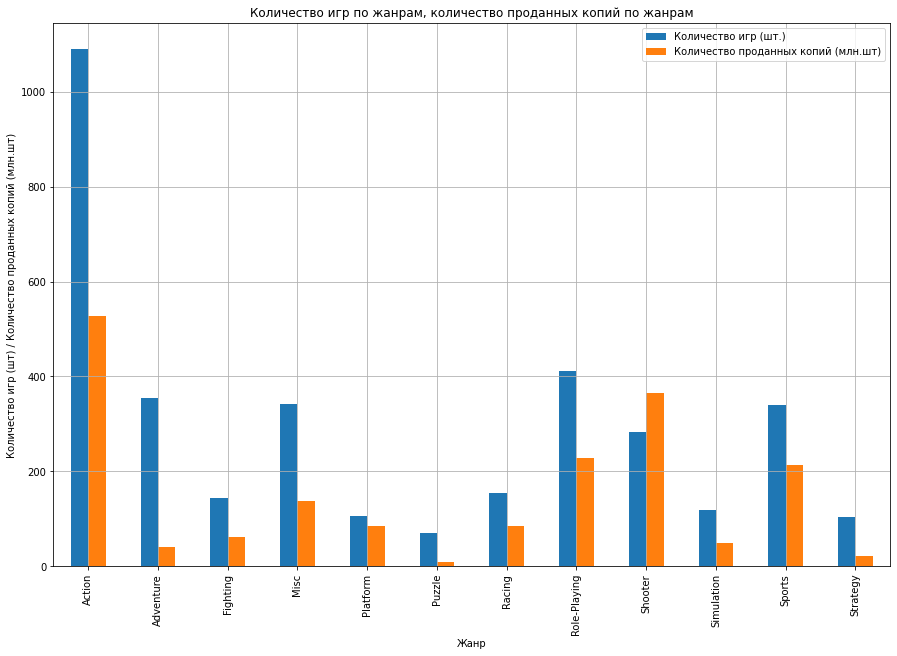

In [30]:
data.pivot_table(index='genre', values='total_sales', aggfunc=('count','sum')).plot(
    y=['count','sum'], kind='bar', grid=1, figsize=(15, 10));
plt.title('Количество игр по жанрам, количество проданных копий по жанрам');
plt.xlabel('Жанр');
plt.ylabel('Количество игр (шт) / Количество проданных копий (млн.шт)');
plt.legend(['Количество игр (шт.)', 'Количество проданных копий (млн.шт)'])
plt.show()


- Наиболее прибыльные жанры: `Action`, `Shooter` и `Sports`: более 500 млн копий. Исходя из количества, таких игр большинство.
- Наименее прибыльные жанры: `Adventure`, `Fighting`, `Platform`, `Puzzle`, `Simulation` и `Strategy`: менее 250 млн копий
- Игры с жанром `Adventure` распространены (более 750 шт), но характеризуются одним из самых малых значений глобальных продаж (менее 130 млн копий)

## Портрет пользователя по регионам

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)

### Создадим сводную таблицу и построим гистограммы по самым популярным платформам.

Топ-5 самых популярных платформ для региона "Северная Америка" (NA)


platform
X360    226.11
PS3     167.59
PS4      87.25
XOne     78.85
3DS      78.51
Name: na_sales, dtype: float64

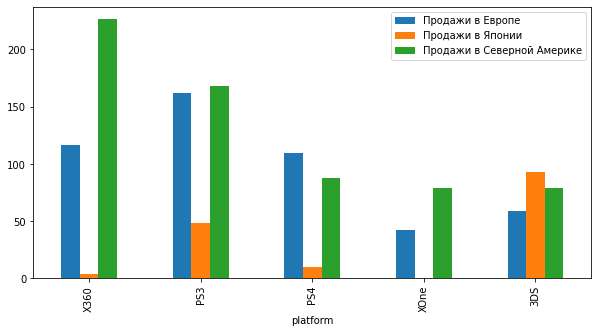

In [31]:
platform_pivot = data.pivot_table(index=['platform'], values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

def most_popular(data_pivot, region_sales):
    display(data_pivot.sort_values(by=region_sales, ascending=False)[region_sales].head());
    #data_pivot.sort_values(by=region_sales, ascending=False)[region_sales].head().plot(y=region_sales, kind='bar', figsize=(10, 5))
    data_pivot.sort_values(by=region_sales, ascending=False).head().plot(kind='bar', figsize=(10, 5))
    plt.legend(['Продажи в Европе', 'Продажи в Японии', 'Продажи в Северной Америке'])
    plt.show;
    
print('Топ-5 самых популярных платформ для региона "Северная Америка" (NA)')    
most_popular(platform_pivot, 'na_sales')

Топ-5 самых популярных платформ для региона "Европа" (EU)


platform
PS3     161.83
X360    116.39
PS4     109.31
3DS      58.94
PC       53.11
Name: eu_sales, dtype: float64

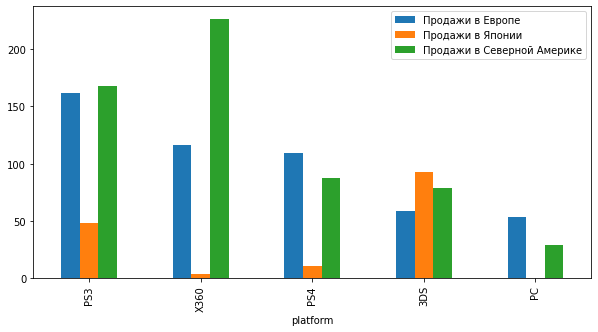

In [32]:
print('Топ-5 самых популярных платформ для региона "Европа" (EU)') 
most_popular(platform_pivot, 'eu_sales')

Топ-5 самых популярных платформ для региона "Япония" (JP)


platform
3DS     92.59
PS3     48.09
PSP     24.04
PSV     18.28
WiiU    12.34
Name: jp_sales, dtype: float64

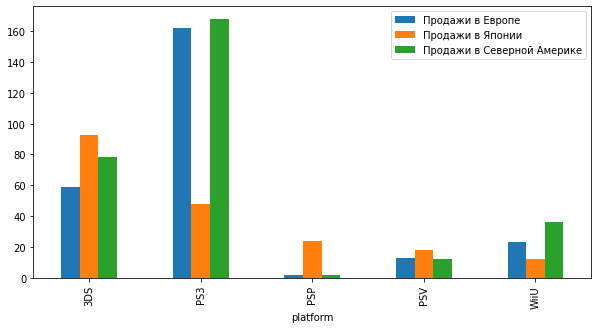

In [33]:
print('Топ-5 самых популярных платформ для региона "Япония" (JP)') 
most_popular(platform_pivot, 'jp_sales')

- Для продаж в Северной Америке платформа `X360` занимает лидирующее место, `Wii` и `PS3` на сравнимых позициях
- Для продаж в Европе платформа `PS3` занимает лидируещее место, дальнейшее распределение аналогично Северной Америке
- Для продаж в Японии распределение полностью отличается от Европы и Северной Америки. В лидерах компактные платформы `DS` и `3DS`, а `X360` и `PS4` не представлены в топ-5 по Японии

### Создадим сводную таблицу и построим гистограммы по самым популярным жанрам.

Топ-5 самых популярных жанров для региона "Северная Америка" (NA)


genre
Action          221.63
Shooter         178.19
Sports          101.16
Role-Playing     77.89
Misc             68.93
Name: na_sales, dtype: float64

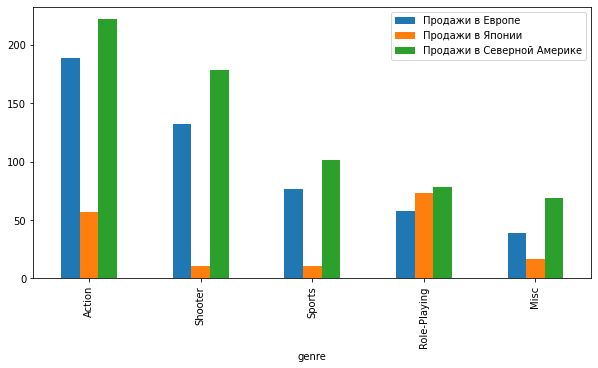

In [34]:
genre_pivot = data.pivot_table(index=['genre'], values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

print('Топ-5 самых популярных жанров для региона "Северная Америка" (NA)')    
most_popular(genre_pivot, 'na_sales')

Топ-5 самых популярных жанров для региона "Европа" (EU)


genre
Action          188.44
Shooter         132.12
Sports           76.46
Role-Playing     58.02
Misc             39.06
Name: eu_sales, dtype: float64

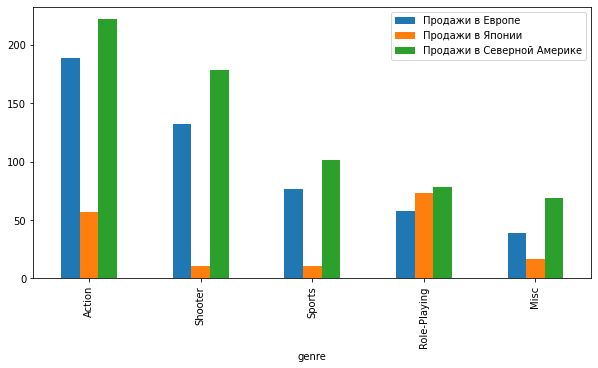

In [35]:
print('Топ-5 самых популярных жанров для региона "Европа" (EU)')    
most_popular(genre_pivot, 'eu_sales')

Топ-5 самых популярных жанров для региона "Япония" (JP)


genre
Role-Playing    73.26
Action          56.55
Misc            16.56
Platform        12.02
Fighting        11.63
Name: jp_sales, dtype: float64

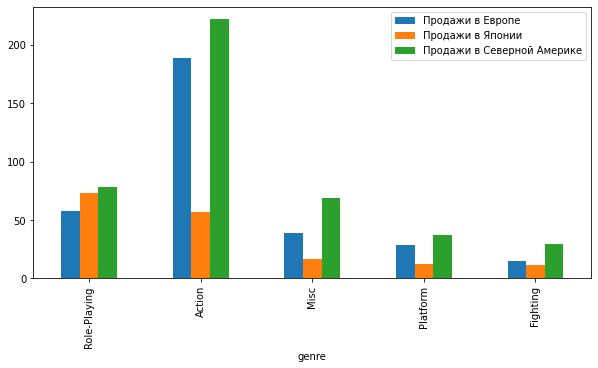

In [36]:
print('Топ-5 самых популярных жанров для региона "Япония" (JP)')    
most_popular(genre_pivot, 'jp_sales')

- Для Северной Америки и Европы характерно одинаковое распределение популярности жанров, по убыванию: `Action`, `Shooter`, `Sports`, `Misc`, `Racing`
- Для продаж в Японии распределение отличается от Европы и Северной Америки. В лидерах жанр `Role-Playing`, далее аналогично Северной Америке и Европе с учетом отсутствия в топ-5 по Японии жанра `Shooter` и `Racing`. Вместо них популярность в Японии имеет жанр `Platform`

### Оценка влияния рейтинга ESRB на продажи в отдельном регионе.

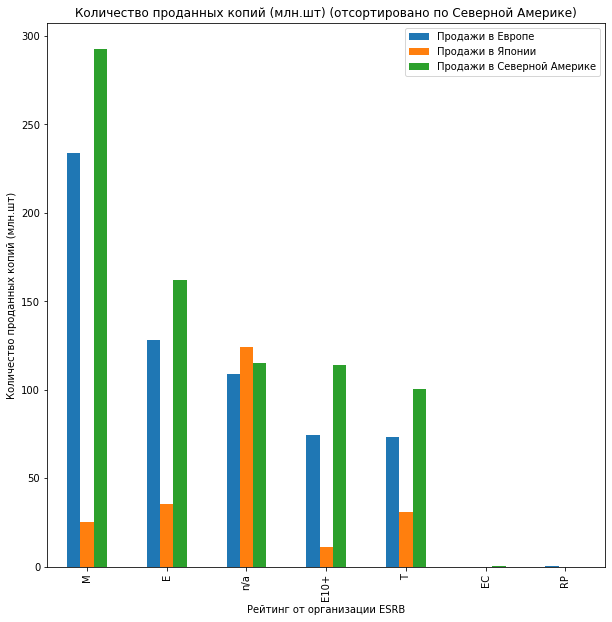

In [37]:
esrb_pivot = data.pivot_table(index=['rating'], values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
esrb_pivot.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(10, 10))
plt.title('Количество проданных копий (млн.шт) (отсортировано по Северной Америке)');

plt.legend(['Продажи в Европе', 'Продажи в Японии', 'Продажи в Северной Америке'])
plt.xlabel('Рейтинг от организации ESRB');
plt.ylabel('Количество проданных копий (млн.шт)');
plt.show;

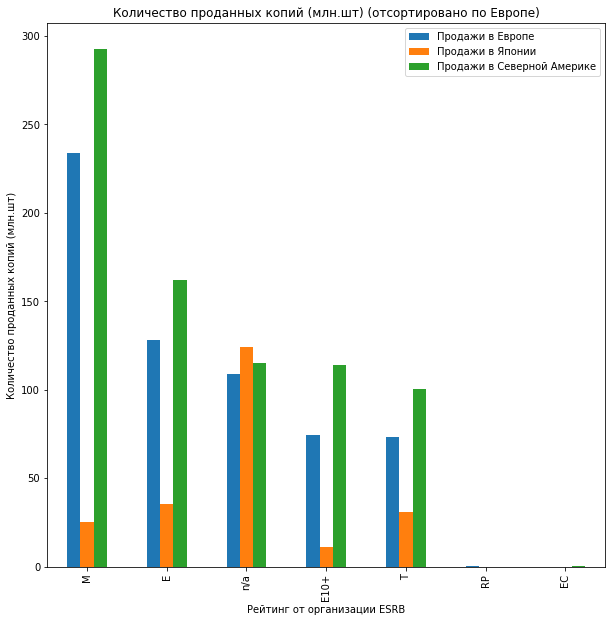

In [38]:
esrb_pivot.sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(10, 10))
plt.title('Количество проданных копий (млн.шт) (отсортировано по Европе)');

plt.legend(['Продажи в Европе', 'Продажи в Японии', 'Продажи в Северной Америке'])
plt.xlabel('Рейтинг от организации ESRB');
plt.ylabel('Количество проданных копий (млн.шт)');
plt.show;

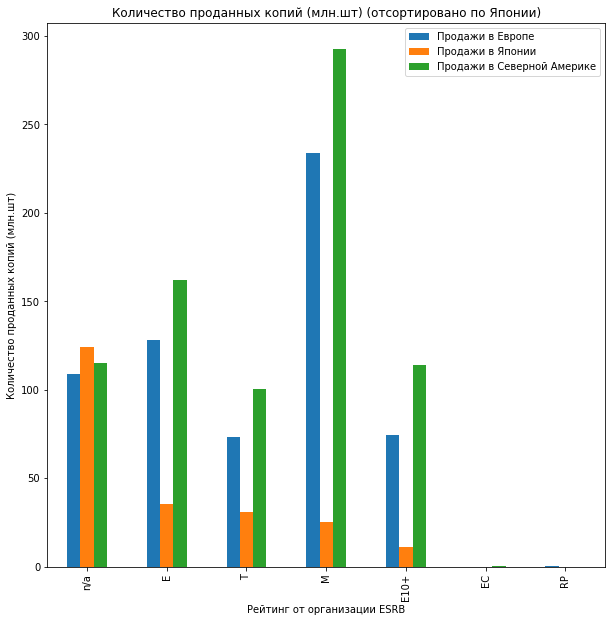

In [39]:
esrb_pivot.sort_values(by='jp_sales', ascending=False).plot(kind='bar', figsize=(10, 10))
plt.title('Количество проданных копий (млн.шт) (отсортировано по Японии)');

plt.legend(['Продажи в Европе', 'Продажи в Японии', 'Продажи в Северной Америке'])
plt.xlabel('Рейтинг от организации ESRB');
plt.ylabel('Количество проданных копий (млн.шт)');
plt.show;

Оценка влияния рейтинга ESRB на продажи в отдельном регионе:
 - В целом, распределение для Европы и Северной Америки схожи
 - Для всех регионов подавляющее число продаж приходится суммарно на рейтинги `"E"`, `"E10+"`, `"M"`, `"T"` а также на игры без рейтинга, отмеченные как `"n/a"`
 - Для всех регионов на рейтинги `"EC"` и `"RP"` приходится незначительное число продаж
 - Для Япония и Европа регионов на рейтинг `"E10+"` приходится наименьшее количество продаж среди рейтингов `"E"`, `"E10+"`, `"M"`,  `"T"` и `"n/a"`
 
 - Для регионов Северная Америка и Европа максимальные продажи характерны для рейтинга `"E"` и `"M"`
 - Для Японии характерно особое распределение продаж. Большинство продаваемых игр в Японии не имеют рейтинга ESRB (отмечен как `"n/a"`)

## Проверка гипотез.

**Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

```
H_0: Средний пользоват. рейтинг (user_score) платформы XOne = Средний пользоват. рейтинг (user_score) платформы PC
H_a: Средний пользоват. рейтинг (user_score) платформы XOne ≠ Средний пользоват. рейтинг (user_score) платформы PC
alpha = 0.05
```

In [40]:
results = st.ttest_ind(
    data[data['platform'] =='XOne']['user_score'].dropna(), 
    data[data['platform'] =='PC']['user_score'].dropna(),
    equal_var = False)


alpha = .05 # зададим значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

    

0.9635189584289586
Не получилось отвергнуть нулевую гипотезу


**Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные**

```
H_0: Средний пользоват. рейтинг (user_score) жанра Action = Средний пользоват. рейтинг (user_score) жанра Sports
H_a: Средний пользоват. рейтинг (user_score) жанра Action ≠ Средний пользоват. рейтинг (user_score) жанра Sports
alpha = 0.05
```

In [41]:
results = st.ttest_ind(
    data[data['genre'] =='Action']['user_score'].dropna(), 
    data[data['genre'] =='Sports']['user_score'].dropna(),
    equal_var = False)


alpha = .05 # зададим значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


1.2494020815845927e-16
Отвергаем нулевую гипотезу


**Объяснение формулировки нулевой и альтернативной гипотез, описание критерия для проверки гипотез.**

Нулевая гипотеза выбрана исходя из необходимости сравнения средних двух генеральных совокупностей. H_0 всегда формулируется так, чтобы использовать знак равенства.

Исходя из H_0 формулируется альтернативная гипотеза H_a

В качестве критерия значимости для проверки гипотез был выбрана статистика разности p-value

Пороговое значение для уровня значимости p-value принято в 5%. 

## Общий вывод.

# Источник данных
Рассматриваемый набор данных представляет собой исторические данные, размером 16715 записей, полученные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

# Предобработка данных

###### Сводная таблица с описанием данных, методами и результатами предобработки:

|Параметр|Тип данных|Новый тип данных|Описание данных|Кол-во пропусков в исходных данных|Метод замены пропусков
|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------
|name|object|-|название игры|2|Удаление
|platform|object|-|платформа|0|-
|year_of_release|float64|Int64|год выпуска|269|Удаление
|genre|object|-|жанр игры|2|Удаление
|na_sales|float64|-|продажи в Северной Америке (миллионы проданных копий)|0|-
|eu_sales|float64|-|продажи в Европе (миллионы проданных копий)|0|-
|jp_sales|float64|-|продажи в Японии (миллионы проданных копий)|0|-
|other_sales|float64|-|продажи в других странах (миллионы проданных копий)|0|-
|critic_score|float64|-|оценка критиков (максимум 100)|8578|Пропуски не менялись
|user_score|object|float64|оценка пользователей (максимум 10)|6701|Пропуски не менялись
|rating|object|-|Рейтинг от организации ESRB|6766|Замена на "n/a" (Без рейтинга)

###### Замена дубликатов и удаление пропусков:
В рамках исследования было выполнено
  - изменение названий столбцов
  - преобразование типов данных в столбцах `year_of_release` и `user_score` в соответсвтующие по смыслу
  - поиск и удаление явных / неявных дубликатов в столбцах  `name`, `platform`, `genre` и `rating`
  - обработка пропусков в столбцах `name`, `genre` и `year_of_release`
  - замена пропусков в столбцах `rating` на строку-заглушку "без рейтинга" ("n/a")

###### Добавление данных:
В целях категоризации при исследовании данных был введен дополнительный столбец `total_sales` с суммарными продажами по всем регионам.

# Цели проекта
>Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

>Нужно отработать принцип работы с данными.


# Выводы по проекту

*Оценка зависимости глобальных продаж от рейтингов пользователей*

- **Оценки пользователей слабо коррелируют с глобальными продажами**, рассчитанный коэффициент корреляции составляет -0.27..+0.17, в зависимости от платформы, можно считать его пренебрежимо малым. 
- Оценки критиков коррелируют с глобальными продажами положительно для исследуемых платформ, но слабовыраженно.  Рассчитанный коэффициент корреляции составляет +0.49.. + 0.58, в зависимости от платформы, он положительный, однако так же не настолько значимый, чтобы говорить о существенной взаимосвязи. 
- Корреляция оценок пользователей с глобальными продажами стабильно меньше чем корреляция оценок критиков с глобальными продажами. Именно **оценки критиков можно считать более предпочтительными при оценке потеницально прибыльных игр.**

*Оценка прибыльности жанров*

- **Наиболее прибыльные** жанры: **`Action`, `Shooter` и `Sports`**: более 500 млн копий. Исходя из количества, таких игр большинство.
- Наименее прибыльные жанры: `Adventure`, `Fighting`, `Platform`, `Puzzle`, `Simulation` и `Strategy`: менее 250 млн копий
- Игры с жанром `Adventure` распространены (более 750 шт), но характеризуются одним из самых малых значений глобальных продаж (менее 130 млн копий)

*Оценка прибыльности платформ по регионам*

- Для продаж **в Северной Америке платформа `X360` занимает лидирующее место**, `Wii` и `PS3` на сравнимых позициях
- Для продаж **в Европе платформа `PS3` занимает лидируещее место**, дальнейшее распределение аналогично Северной Америке
- Для продаж в Японии распределение полностью отличается от Европы и Северной Америки. **Для Японии лидеры компактные платформы `DS` и `3DS`**, а `X360` и `PS4` не представлены в топ-5 по Японии

*Оценка прибыльности жанров по регионам*

- **Для Северной Америки и Европы характерно одинаковое распределение популярности жанров**, по убыванию: `Action`, `Shooter`, `Sports`, `Misc`, `Racing`
- Для продаж **в Японии распределение отличается от Европы и Северной Америки**. **В лидерах жанр `Role-Playing`**, далее аналогично Северной Америке и Европе с учетом отсутствия в топ-5 по Японии жанра `Shooter` и `Racing`. Вместо них популярность в Японии имеет жанр `Platform`

*Оценка влияния рейтинга ESRB на продажи по регионам*

 - В целом, распределение для Европы и Северной Америки схожи
 - Для всех регионов **наибольшее число продаж приходится суммарно на рейтинги `"E"`, `"E10+"`, `"M"`, `"T"` а также на игры без рейтинга, отмеченные как `"n/a"`**
 - Для всех регионов на рейтинги `"EC"` и `"RP"` приходится незначительное число продаж
 - Для Япония и Европа регионов на рейтинг `"E10+"` приходится наименьшее количество продаж среди рейтингов `"E"`, `"E10+"`, `"M"`,  `"T"` и `"n/a"`
 - Для регионов Северная Америка и Европа максимальные продажи характерны для рейтинга `"E"` и `"M"`
 - Для Японии характерно особое распределение продаж. Большинство продаваемых игр в Японии не имеют рейтинга ESRB (отмечен как `"n/a"`)
 
*Проверка гипотез.*
 
- Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: **не может быть отвергнута **
- Средние пользовательские рейтинги жанров Action и Sports разные: **не может быть отвергнута**, т.к. была отвергнута противоположная нулевая гипотеза